In typical environments our data would be available in a relational database (or some other common data store) and spread across multiple tables/documents/files. To access it, we would first need to get our credentials and access authorizations and familiarize ourselves with the data schema.

In thos notebook, however, things are much simpler: we will just download a single compressed file, housing.tgz, which contains a comma-separated values (CSV) file called `housing.csv` with all the data.

It is preferable to create a small function to do that. Having a function that downloads the data is useful in particular if the data changes regularly: we can write a small script that uses the function to fetch the latest data (or we can set up a scheduled job to do that automatically at regular inter‐ vals). Automating the process of fetching the data is also useful if we need to install the dataset on multiple machines.

The next cell is the function to fetch the data:

In [1]:
import os
import tarfile
import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/QubitPi/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

fetch_housing_data()

Now let's load the data using [pandas](https://pandas.pydata.org/)

In [2]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

housing = load_housing_data()
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

The `info()` method is useful to get a quick description of the data, in particular the total number of rows, each attribute’s type, and the number of nonnull values

In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


All attributes are numerical, except the `ocean_proximity` field. Its type is object, so it could hold any kind of Python object. But since we loaded this data from a CSV file, we know that it must be a text attribute. When we looked at the top five rows, we probably noticed that the values in the `ocean_proximity` column were repetitive, which means that it is probably a categorical attribute. We can find out what categories exist and how many districts belong to each category by using the `value_counts()` method

In [4]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

Let’s look at the other fields. The `describe()` method shows a summary of the numerical attributes

In [5]:
housing.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

Another quick way to get a feel of the type of data we are dealing with is to plot a histogram for each numerical attribute. A histogram shows the number of instances (on the vertical axis) that have a given value range (on the horizontal axis). We can either plot this one attribute at a time, or we can call the `hist()` method on the whole dataset (as shown in the following code example), and it will plot a histogram for each numerical attribute

It should be noted that the median income attribute does not look like it is expressed in US dollars (USD). In fact, the data has been scaled and capped at 15 (actually, 15.0001) for higher median incomes, and at 0.5 (actually, 0.4999) for lower median incomes. The numbers represent roughly tens of thousands of dollars (e.g., 3 actually means about $30,000). __Working with preprocessed attributes is common in Machine Learning, and it is not necessarily a problem, but we should try to understand how the data was computed__.

What's indeed a problem is that housing median age and the median house value were also capped. The latter may be a serious problem since it is our target attribute (our labels). Our Machine Learning algorithms may learn that prices never go beyond that limit. We need to check with our business team to see if this is a problem or not. If they tell us that they need precise predictions even beyond $500,000, then we have two options:

1. Collect proper labels for the districts whose labels were capped.
2. Remove those districts from the training set (and also from the test set, since our system should not be evaluated poorly if it predicts values beyond $500,000).

Finally, many histograms are _tail-heavy_: they extend much farther to the right of the median than to the left. This may make it a bit harder for some Machine Learning algorithms to detect patterns. We will try transforming these attributes later on to have more bell-shaped distributions.

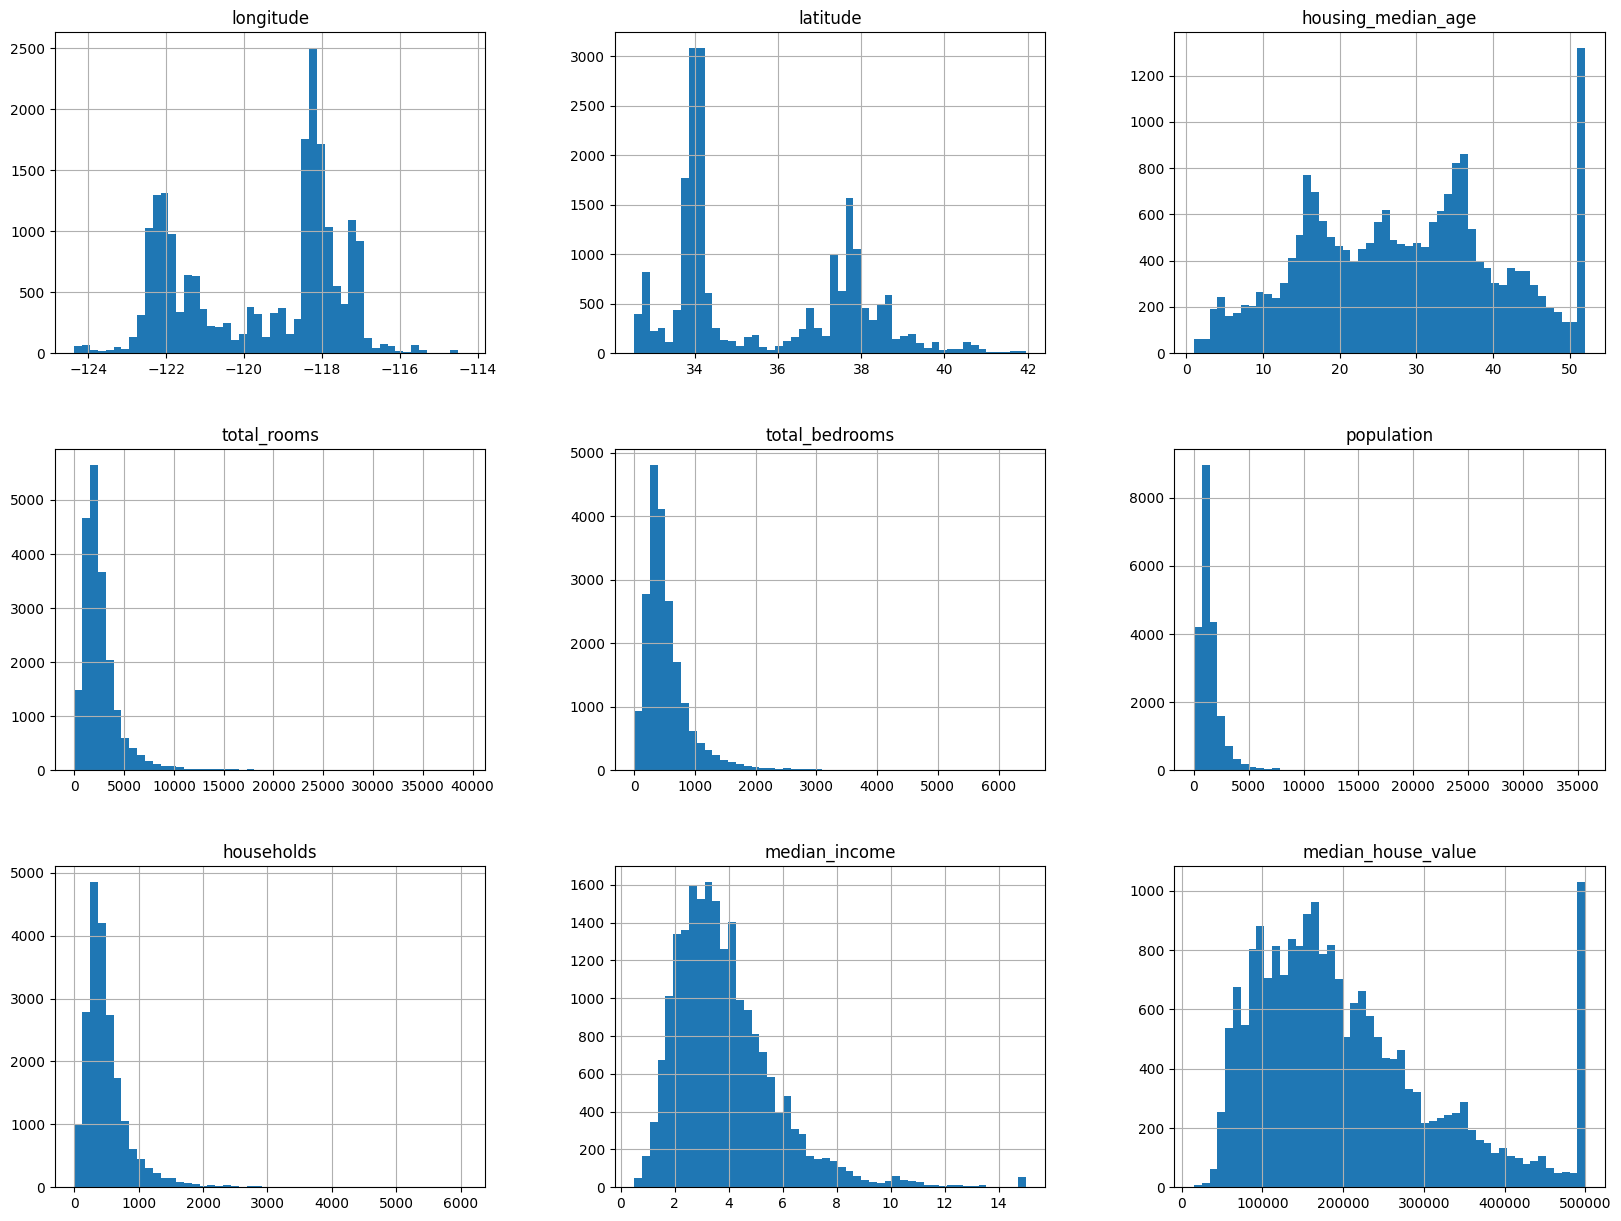

In [6]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

Now before we look at the data any further, we need to create a test set, put it aside, and __never look at it__.

Creating a Test Set
-------------------

It may sound strange to voluntarily set aside part of the data at this stage. After all, we have only taken a quick glance at the data, and surely we should learn a whole lot more about it before we decide what algorithms to use, right? This is true, but our brain is an amazing pattern detection system, which means that it is highly prone to overfitting: if we look at the test set, we may stumble upon some seemingly interesting pattern in the test data that leads us to select a particular kind of Machine Learning model. When we estimate the generalization error using the test set, our estimate will be too optimistic, and we will launch a system that will not perform as well as expected. This is called _data snooping_ bias.

Creating a test set is theoretically simple: pick some instances randomly, typically 20% of the dataset (or less if your dataset is very large), and set them aside:

```python
import numpy as np

def split_training_and_test_data(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    training_indices = shuffled_indices[test_set_size:]
    return data.iloc[training_indices], data.iloc(test_indices)

training_set, test_set = split_training_and_test_data(housing, 0.2)
```

Well, this works, but it is not perfect: if we run the program again, it will generate a different test set! Over time, we (or our Machine Learning algorithms) will get to see the whole dataset, which is what we want to avoid.

To have a stable train/test split even after updating the dataset, a common solution is to use each instance’s identifier to decide whether or not it should go in the test set (assuming instances have a unique and immutable identifier). For example, we could compute a hash of each instance’s identifier and put that instance in the test set if the hash is lower than or equal to 20% of the maximum hash value. This ensures that the test set will remain consistent across multiple runs, even if we refresh the dataset. The new test set will contain 20% of the new instances, but it will not contain any instance that was previously in the training set.

Here is a possible implementation:

```python
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio)) return data.loc[~in_test_set], data.loc[in_test_set]
```

Unfortunately, the housing dataset does not have an identifier column. The simplest solution is to use the row index as the ID:

```python
housing_with_id = housing.reset_index() # adds an `index` column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")
```

If we use the row index as a unique identifier, we need to make sure that new data gets appended to the end of the dataset and that no row ever gets deleted. If this is not possible, then we can try to use the most stable features to build a unique identifier. For example, a district’s latitude and longitude are guaranteed to be stable for a few million years, so we could combine them into an ID like so

```python
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")
```

__Scikit-Learn__ provides a few functions to split datasets into multiple subsets in various ways. The simplest function is `train_test_split()`, which does pretty much the same thing as the function `split_training_and_test_data()`, with a couple of additional features. First, there is a `random_state` parameter that allows us to set the random generator seed. Second, we can pass it multiple datasets with an identical number of rows, and it will split them on the same indices (this is very useful, for example, if we have a separate DataFrame for labels):

```python
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
```

So far we have considered purely random sampling methods. This is generally fine if our dataset is large enough (especially relative to the number of attributes), but if it is not, we run the risk of introducing a significant sampling bias. We want a sampling that is representative of the whole dataset. For this, we need to use some domain knowledge.

Suppose we chatted with experts who told us that the median income is a very important attribute to predict median housing prices. We may want to ensure that the test set is representative of the various categories of incomes in the whole dataset. Since the median income is a continuous numerical attribute, we first need to create an income _category_ attribute. Let’s look at the median income histogram above more closely: most median income values are clustered around 1.5 to 6 (i.e., $15,000–$60,000), but some median incomes go far beyond 6. It is important to have a sufficient number of instances in our dataset for each stratum, or else the estimate of a stratum’s importance may be biased. This means that we should not have too many strata, and each stratum should be large enough. The following code uses the `pd.cut()` function to create an income category attribute with five categories (labeled from 1 to 5): category 1 ranges from 0 to 1.5 (i.e., less than $15,000), category 2 from 1.5 to 3, and so on:

<Axes: >

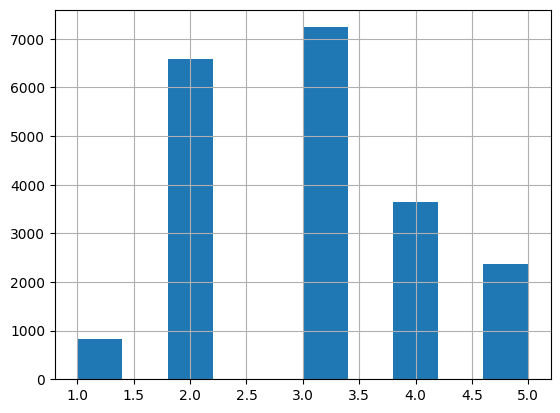

In [7]:
import numpy as np

housing["income_category"] = pd.cut(housing["median_income"], bins=[0, 1.5, 3, 4.5, 6, np.inf], labels=[1, 2, 3, 4, 5])
housing["income_category"].hist()

We use this to construct a __stratified sampling__, i.e. the number of samples of each median income category follows the same distribution shown above. For this, we can use Scikit-Learn’s `StratifiedShuffleSplit` class:

In [8]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_category"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

Let’s see if this worked as expected. We can start by looking at the income category proportions in the test set:

In [9]:
strat_test_set["income_category"].value_counts() / len(strat_test_set)

income_category
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

Now we should remove the income_cat attribute so the data is back to its original state:

In [10]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_category", axis=1, inplace=True)

Visualizing Data
----------------

First, make sure we have put the test set aside and we are only exploring the training set. Also, if the training set is very large, we may want to sample an exploration set, to make manipulations easy and fast. In our case, the set is quite small, so we can just work directly on the full set. Let’s create a copy so that we can play with it without harming the training set:

In [11]:
housing = strat_train_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

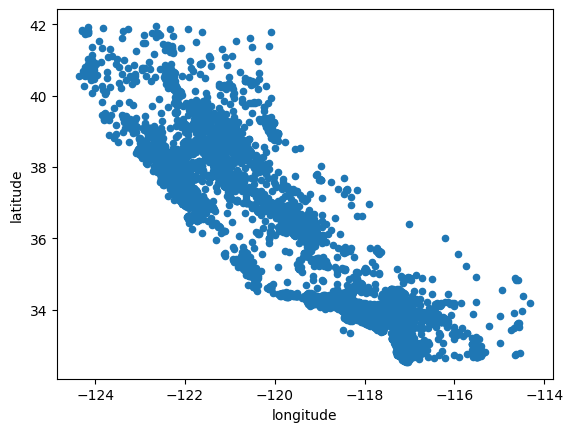

In [12]:
housing.plot(kind="scatter", x="longitude", y="latitude")

<Axes: xlabel='longitude', ylabel='latitude'>

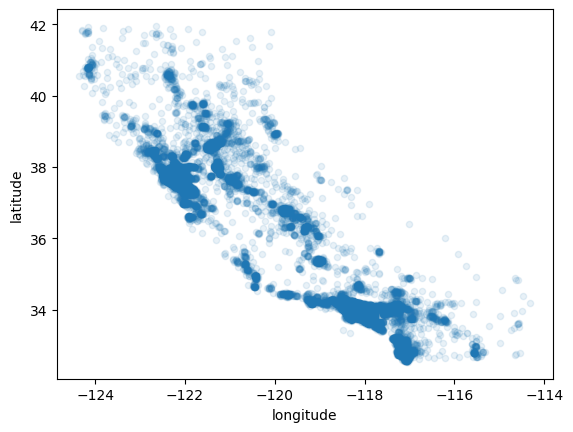

In [13]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

Now that’s much better: we can clearly see the high-density areas, namely the Bay Area and around Los Angeles and San Diego, plus a long line of fairly high density in the Central Valley, in particular around Sacramento and Fresno.

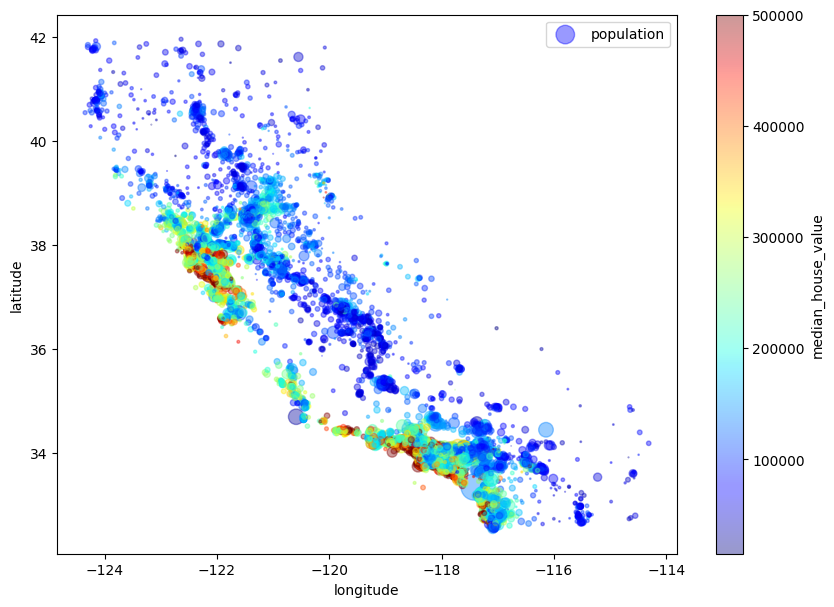

In [14]:
housing.plot(
    kind="scatter",
    x="longitude",
    y="latitude",
    alpha=0.4,
    s=housing["population"]/100,
    label="population",
    figsize=(10,7),
    c="median_house_value",
    cmap=plt.get_cmap("jet"),
    colorbar=True,
)
plt.legend()

Now let’s look at the housing prices shown in the figure above. The radius of each circle represents the district’s population (option `s`), and the color represents the price (option `c`). We will use a predefined color map (option `cmap`) called `jet`, which ranges from blue (low values) to red (high prices)

### Looking for Correlations

Since the dataset is not too large, we can easily compute the standard correlation coefficient (also called Pearson’s r) between every pair of attributes using the `corr()` method:

In [15]:
corr_matrix = housing.corr(numeric_only=True) # https://github.com/ageron/handson-ml2/issues/614

In [16]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

The correlation coefficient ranges from –1 to 1

- When the coefficient is close to 1, it means that there is a strong positive correlation
- When the coefficient is close to –1, it means that there is a strong negative correlation
- Coefficients close to 0 mean that there is no linear correlation

> The correlation coefficient only measures linear correlations (“if x goes up, then y generally goes up/down”). It may completely miss out on nonlinear relationships (e.g., “if x is close to 0, then y gener‐ ally goes up”).

Another way to check for correlation between attributes is to use the pandas `scatter_matrix()` function, which plots every numerical attribute against every other numerical attribute. Since there are now 11 numerical attributes, we would get 11 x 11 = 121 plots, which would not fit on a page; so let’s just focus on a few promising attributes that seem most correlated with the median housing value:

> Note that the main diagonal (top left to bottom right) would be full of straight lines if pandas plotted each variable against itself, which would not be very useful. So instead pandas displays a histogram of each attribute (other options are available; see the pandas documentation for more details).

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

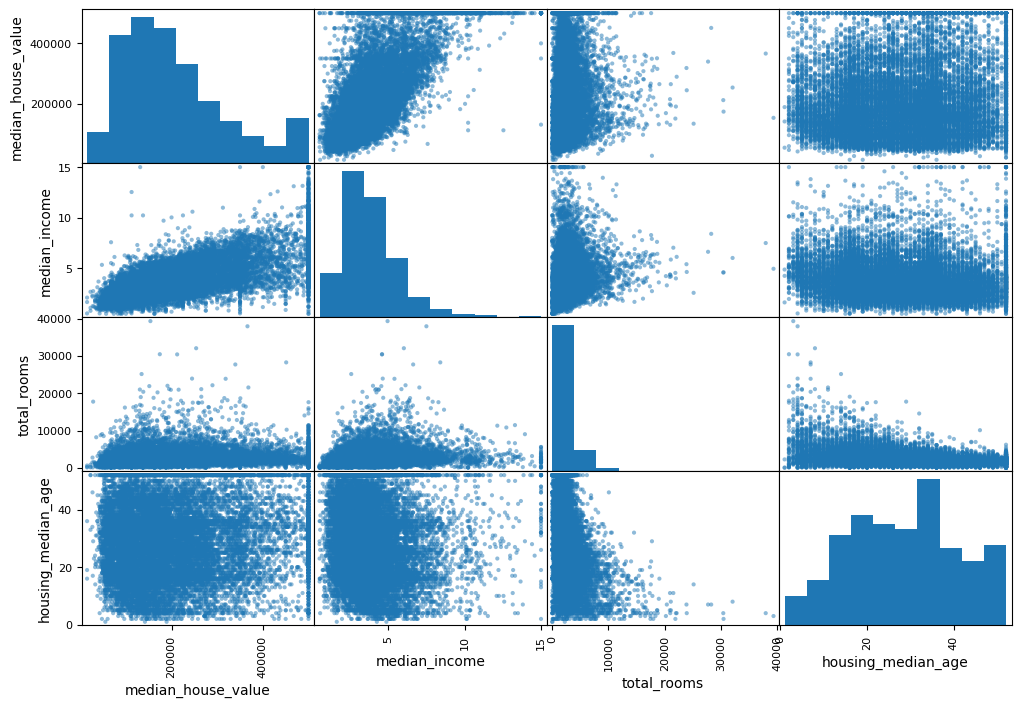

In [17]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

### Experimenting with Attribute Combinations

In [18]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [19]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

We see that the new `bedrooms_per_room` attribute is much more correlated with the median house value than the total number of rooms or bedrooms shown previsouly. Trying out various attribute combinations could also give us useful insights that will help us get a good prototype in the next training iteration.

Preparing the Data for Machine Learning Algorithms
--------------------------------------------------

After we have gained enough empirical ideas on what our data looks like, it's time to feed the data into a data preprocessing pipeline and use the preprosessed data to train a model.

What we mean by "preprocessing" is to make sure our training data doesn't contain any value that could potentially trigger a runtime error during model training. For our housing data, we will execute the following 4 preprocessings in order:

1. Handling the missing feautre values in dataset
2. Handling text and categorical attributes
3. [Composing attributes](#Experimenting-with-Attribute-Combinations)
4. Feature scaling

We will show the code for each of these 4 steps separately below

But first let’s separate the predictors and the labels, since we don’t necessarily want to apply the same transformations to the predictors and the target values :

In [20]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

### Handling Missing Values

Most Machine Learning algorithms cannot work with missing features. We saw earlier that the `total_bedrooms` attribute has some missing values. We have 3 options:

1. Get rid of the corresponding districts.
2. Get rid of the whole attribute.
3. Set the values to some value (zero, the mean, the median, etc.).

Scikit-Learn provides a handy class to take care of missing values: `SimpleImputer`:

In [21]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

Since the median can only be computed on numberical attributes, we need to create a copy of the data without the text attribute `ocean_proximity` and then fit the data. The result is a plain NumPy array containing the transformed features that are put back into a pandas `DataFrame`

In [22]:
housing_num = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)
X = imputer.transform(housing_num)
housing_train = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

### Handling Text and Categorical Attributes

In [23]:
housing_categories = housing[["ocean_proximity"]] # https://stackoverflow.com/a/45201152/14312712
housing_categories.head(10)

ocean_proximity
12655          INLAND
15502      NEAR OCEAN
2908           INLAND
14053      NEAR OCEAN
20496       <1H OCEAN
1481         NEAR BAY
18125       <1H OCEAN
5830        <1H OCEAN
17989       <1H OCEAN
4861        <1H OCEAN

We see the only text attribute, `ocean_proximity`, is not random text, but a limited number of possible values, each of which represents a category. Moast machine-learning algorithms perfer working with numbers, so let's convert these categories to numbers. For this, we use scikit-learn's `OrdinalEncoder`:

In [24]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_categories_encoded = ordinal_encoder.fit_transform(housing_categories)
housing_categories_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [25]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

One issue with this representation is that ML algorithms will assume that two nearby values are more similar than two distant values. This may be fine in some cases (e.g., for ordered categories such as “bad,” “average,” “good,” and “excellent”), but it is obviously not the case for the `ocean_proximity` column (for example, categories 0 and 4 are clearly more similar than categories 0 and 1). To fix this issue, a common solution is to create one binary attribute per category:

- one attribute equal to 1 when the category is `<1H OCEAN` and 0, otherwise
- one attribute equal to 1 when the category is 'INLAND' and 0, otherwise
- so on and so forth...

This is called __one-hot encoding__, because only one attribute will be equal to 1 (hot) while others will all be 0 (cold) for one row from the housing data. The new attribute are sometimes called _dummy_ attribute. scikit-learn offers a `OneHotEncoder` class to convert categorical values into one-hot vectors:

In [26]:
from sklearn.preprocessing import OneHotEncoder

categories_encoder = OneHotEncoder()
housing_categories_1hot = categories_encoder.fit_transform(housing_categories)
housing_categories_1hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16512 stored elements and shape (16512, 5)>

If a categorical attribute has a large number of possible categories (e.g., country code, profession, species), then one-hot encoding will result in a large number of input features. This may slow down training and degrade performance. If this happens, we may want to replace the categorical input with useful numerical features related to the categories: for example, we could replace the `ocean_proximity` feature with the distance to the ocean (similarly, a country code could be replaced with the country’s population and GDP per capita). Alternatively, we could replace each category with a learnable, low-dimensional vector called an embedding. Each category’s representation would be learned during training. This is an example of _representation learning_

### Composing Attributes (Custom Transformers)

Before moving on, let's pause for a second for one question: "How would we bundle up preprocessing steps together?" This is an important question because at the end of the day the increasing degree of automation is required so that 

- we could reproduce these transformations easily on any dataset
- we will be able to gradually build transformation library with increasing complexity
- we are able to perform typerparameter tunning which greatly enhances the quality of Machine Learning outcome (we will briefly touch this in this section)

sciki-learn, for this purpose, introduced __transformers__. Let's pick up the attribute composition we have done early and re-do it using such transformer

From the `housing.head()` we used earlier, we need and know the indexes of following 4 attributes:

1. `total_rooms` = 3
2. `total_bedrooms` = 4
3. `population` = 5
4. `households` = 6

In [27]:
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
12655    -121.46     38.52                29.0       3873.0           797.0   
15502    -117.23     33.09                 7.0       5320.0           855.0   
2908     -119.04     35.37                44.0       1618.0           310.0   
14053    -117.13     32.75                24.0       1877.0           519.0   
20496    -118.70     34.28                27.0       3536.0           646.0   

       population  households  median_income ocean_proximity  
12655      2237.0       706.0         2.1736          INLAND  
15502      2015.0       768.0         6.3373      NEAR OCEAN  
2908        667.0       300.0         2.8750          INLAND  
14053       898.0       483.0         2.2264      NEAR OCEAN  
20496      1837.0       580.0         4.4964       <1H OCEAN

In [28]:
from sklearn.base import BaseEstimator, TransformerMixin

TOTAL_ROOMS_IDX = 3
TOTAL_BEDROOMS_IDX = 4
POPULATION_IDX = 5
HOUSEHOLDS_IDX = 6

class CombineAttributesTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self # do nothing
    def transform(self, X):
        rooms_per_household = X[:, TOTAL_ROOMS_IDX] / X[:, HOUSEHOLDS_IDX]
        population_per_household = X[:, POPULATION_IDX] / X[:, HOUSEHOLDS_IDX]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, TOTAL_BEDROOMS_IDX] / X[:, TOTAL_ROOMS_IDX]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

transformer = CombineAttributesTransformer(add_bedrooms_per_room=False)
housing_extra_attributes = transformer.transform(housing.values)

In this example the transformer has one hyperparameter, `add_bedrooms_per_room`, set to `True` by default (it is often helpful to provide sensible defaults). This hyperparameter will allow us to easily find out whether adding this attribute helps the Machine Learning algorithms or not. More generally, we can add a hyperparameter to gate any data preparation step that we are not 100% sure about. The more we automate these data preparation steps, the more combinations we can automatically try out, making it much more likely that we will find a great combination (and saving us a lot of time).

### Feature Scaling

With few exceptions, Machine Learning algorithms don’t perform well when the input numerical attributes have very different scales. There are two common ways to get all attributes to have the same scale: 

1. min-max scaling
2. standardization.

Min-max scaling (many people call this _normalization_) is the simplest: values are shifted and rescaled so that they end up ranging from 0 to 1. We do this by subtracting the min value and dividing by the max minus the min. __Scikit-Learn provides a transformer called _MinMaxScaler_ for this__. It has a `feature_range` hyperparameter that lets us change the range if, for some reason, we don’t want 0 ~ 1.

Standardization is different: first it subtracts the mean value (so standardized values always have a zero mean), and then it divides by the standard deviation so that the resulting distribution has unit variance. Unlike min-max scaling, standardization does not bound values to a specific range, which may be a problem for some algorithms (e.g., neural networks often expect an input value ranging from 0 to 1). However, standardization is much less affected by outliers. For example, suppose a district had a median income equal to 100 (by mistake). Min-max scaling would then crush all the other values from 0 ~ 15 down to 0 ~ 0.15, whereas standardization would not be much affected. __Scikit-Learn provides a transformer called `StandardScaler` for standardization__.

#### Puting Things Together - Transformation Pipelines

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

numerical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("combine_attr_transformer", CombineAttributesTransformer()),
    ("std_scaler", StandardScaler())
])

pipeline = ColumnTransformer([
    ("numerical", numerical_pipeline, list(housing_num)),
    ("categorical", OneHotEncoder(), ["ocean_proximity"])
])

housing_prepared = pipeline.fit_transform(housing)

Selecting and Training a Model
------------------------------

Thanks to all previous steps, we are ready to train a Linear Regression model

In [30]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

Done! We now have a working Linear Regression model. Let’s try it out on a few instances from the training set:

In [31]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = pipeline.transform(some_data)
print("Predicted Price:", lin_reg.predict(some_data_prepared))
print("Actual Price (Label):", list(some_labels))

Predicted Price: [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]
Actual Price (Label): [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


Let’s measure this regression model’s RMSE on the whole train‐ ing set using Scikit-Learn’s `mean_squared_error()` function:

In [32]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

np.float64(68627.87390018745)

Most districts’ `median_housing_values` range between \\$120,000 and \\$265,000, so a typical prediction error of \\$68,628 is not very satisfying. 

This is an example of a model underfitting the training data. When this happens it can mean that the features do not provide enough information to make good predictions, or that the model is not powerful enough.

The main approaches to fix underfitting are to

- select a more powerful model
- feed the training algorithm with better features, or
- reduce the constraints on the model.

This model is not regularized, which rules out the last option. We could try to add more features (e.g., the log of the population), but first let’s try a more complex model to see how it does.

In [33]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

np.float64(0.0)

The model has badly overfit the data. Note that we haven't touched test dataset yet. One way to evaluate the Decision Tree model would be to use such validation set. 

A great alternative is to use scikit-learn’s __K-fold cross-validation__ feature. The following code randomly splits the training set into 10 distinct subsets called __folds__, then it trains and evaluates the Decision Tree model 10 times, picking a different fold for evaluation every time and training on the other 9 folds. The result is an array containing the 10 evaluation scores:

In [34]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [72683.3040288  69837.26399838 68277.46664553 70832.5547978
 71319.06682789 76363.6781665  71071.74339147 74590.95581044
 68344.11769612 72522.53336355]
Mean: 71584.26847264657
Standard deviation: 2436.2835068978843


scikit-learn’s cross-validation features expect a utility function (greater is better) rather than a cost function (lower is better), so the scoring function is actually the opposite of the MSE (i.e., a neg‐ ative value), which is why the preceding code computes `-scores` before calculating the square root.

Now the Decision Tree doesn’t look as good as it did earlier. In fact, it seems to perform worse than the Linear Regression model! Notice that cross-validation allows us to get not only an estimate of the performance of our model, but also a measure of how precise this estimate is (i.e., its standard deviation). 

Let’s compute the same scores for the Linear Regression model just to be sure:

In [35]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean: 69104.07998247063
Standard deviation: 2880.3282098180694


That’s right: the Decision Tree model is overfitting so badly that it performs worse than the Linear Regression model.

Building a model on top of many other models is called __Ensemble Learning__, and it is often a great way to push ML algorithms even further. So let's try Random Forests which trains many Decision Trees on random subsets of the features, then averaging out their predictions:

In [36]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse_scores = np.sqrt(forest_mse)

display_scores(forest_rmse_scores)

Scores: 18736.99179027963
Mean: 18736.99179027963
Standard deviation: 0.0


Fine-Tuning Models
------------------

### Grid Search

One option would be to fiddle with the hyperparameters manually, until we find a great combination of hyperparameter values. This would be very tedious work, and we may not have time to explore many combinations.

Instead, we should get scikit-learn’s `GridSearchCV` to search for us. All we need to do is tell it which hyperparameters we want it to experiment with and what values to try out, and it will use cross-validation to evaluate all the possible combinations of hyperparameter values. For example, the following code searches for the best combination of hyperparameter values for the `RandomForestRegressor`:

In [37]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {"n_estimators": [3, 10, 30], "max_features": [2, 4, 6, 8]},
    {"bootstrap": [False], "n_estimators": [3, 10], "max_features": [2, 3, 4]},
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

This `param_grid` above tells scikit-learn to first evaluate all 3 × 4 = 12 combinations of `n_estimators` and `max_features` hyperparameter values, then try all 2 × 3 = 6 combinations of hyperparameter values in the second dict, but this time with the `bootstrap` hyperparameter set to `False`

As a result, the grid search will explore 12 + 6 = 18 combinations of `RandomForestRegressor` hyperparameter values, train each model `cv=5` times. There will be 18 x 5 = 90 rounds of traninig.

When training is done, we get the besst parameter combination and best estimator (best model) by

In [38]:
grid_search.best_params_
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

And of course the evalueation scores are also available:

In [39]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64067.80507879894 {'max_features': 2, 'n_estimators': 3}
55365.40010888244 {'max_features': 2, 'n_estimators': 10}
52614.943465297416 {'max_features': 2, 'n_estimators': 30}
60866.31120992179 {'max_features': 4, 'n_estimators': 3}
52759.338194426055 {'max_features': 4, 'n_estimators': 10}
50463.50988684138 {'max_features': 4, 'n_estimators': 30}
59127.31591272698 {'max_features': 6, 'n_estimators': 3}
52217.22332006632 {'max_features': 6, 'n_estimators': 10}
49876.61688121687 {'max_features': 6, 'n_estimators': 30}
59203.17810977277 {'max_features': 8, 'n_estimators': 3}
52057.49324565108 {'max_features': 8, 'n_estimators': 10}
50128.82371806042 {'max_features': 8, 'n_estimators': 30}
61349.43995199318 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54269.32874253172 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60010.208502793575 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52460.49897168176 {'bootstrap': False, 'max_features': 3, 'n_estimators':

### Randomized Search

The grid search approach is fine when we are exploring relatively _few_ combinations, like in the previous setup, but when the hyperparameter search space is large, it is often preferable to use `RandomizedSearchCV` instead.

This class can be used in much the same way as the `GridSearchCV` class, but instead of trying out all possible combinations, it evaluates a given number of random combinations by selecting a random value for each hyperparameter at every iteration. This approach has two main benefits

1. If we let the randomized search run for, say, 1,000 iterations, this approach will explore 1,000 different values for each hyperparameter (instead of just a few values per hyperparameter with the grid search approach)
2. Simply by setting the number of iterations, we have more control over the computing budget we want to allocate to hyperparameter search.

### Ensemble Methods

Another way to fine-tune our system is to try to combine the models that perform best. The group (or "ensemble") will often perform better than the best individual model (just like Random Forests perform better than the individual Decision Trees they rely on), especially if the individual models make very different types of errors.

### Analyze the Best Models and Their Errors

You will often gain good insights on the problem by inspecting the best models. For example, the `RandomForestRegressor` can indicate the relative importance of each attribute for making accurate predictions:

In [40]:
feature_importances = grid_search.best_estimator_.feature_importances_

extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]

categorical_encoder = pipeline.named_transformers_["categorical"]
cat_one_hot_attribs = list(categorical_encoder.categories_[0])
attributes = list(housing_num) + extra_attribs + cat_one_hot_attribs

sorted(zip(feature_importances, attributes), reverse=True)

[(np.float64(0.29838853675690946), 'median_income'),
 (np.float64(0.16994566339437564), 'INLAND'),
 (np.float64(0.10959517330055447), 'pop_per_hhold'),
 (np.float64(0.09415457324292802), 'bedrooms_per_room'),
 (np.float64(0.07501106217207819), 'longitude'),
 (np.float64(0.06725803061080804), 'latitude'),
 (np.float64(0.06115437871913175), 'rooms_per_hhold'),
 (np.float64(0.041230990130423854), 'housing_median_age'),
 (np.float64(0.01757889188435985), 'population'),
 (np.float64(0.01742476855033225), 'total_rooms'),
 (np.float64(0.017066056355938494), 'total_bedrooms'),
 (np.float64(0.015819055596048247), 'households'),
 (np.float64(0.008964477764109332), '<1H OCEAN'),
 (np.float64(0.0037761767019644883), 'NEAR OCEAN'),
 (np.float64(0.0025326656783163366), 'NEAR BAY'),
 (np.float64(9.949914172160384e-05), 'ISLAND')]

With this information, you may want to try dropping some of the less useful features

### Evaluate Model on the Test Set

After tweaking our models for a while, we eventually have a system that performs sufficiently well. Now is the time to evaluate the final model on the test set.

In [41]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

np.float64(47827.71188556865)